In [ ]:
import pandas as pd
import numpy as np
from google.colab import files



In [ ]:
uploaded = files.upload()

Saving econ_freedom.csv to econ_freedom.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['econ_freedom.csv']))

In [ ]:
df.head()

,Year,ISO Code 2,ISO Code 3,Countries,Economic Freedom Summary Index,Rank,Quartile,1 Size of Government,2 Legal System & Property Rights,3 Sound Money,4 Freedom to trade internationally,5 Regulation,Region,World Bank Region,"World Bank Current Income Classification, 1990-present"
0,2020,AL,ALB,Albania,7.64,26.0,1.0,7.817077,5.260351,9.788269,8.222499,7.112958,Eastern Europe,Europe & Central Asia,UM
1,2020,DZ,DZA,Algeria,5.12,157.0,4.0,4.409943,4.131760,7.630287,3.639507,5.778953,Middle East & North Africa,Middle East & North Africa,LM
2,2020,AO,AGO,Angola,5.91,138.0,4.0,8.133385,3.705161,6.087996,5.373190,6.227545,Sub-Saharan Africa,Sub-Saharan Africa,LM
3,2020,AR,ARG,Argentina,4.87,161.0,4.0,6.483768,4.796454,4.516018,3.086907,5.490538,Latin America & the Caribbean,Latin America & the Caribbean,UM
4,2020,AM,ARM,Armenia,7.84,11.0,1.0,7.975292,6.236215,9.553009,7.692708,7.756333,Caucasus & Central Asia,Europe & Central Asia,UM


In [ ]:
df_rank = df[df["Year"] == 2020]
df_rank_2020 = df_rank[["Countries","Rank"]]
df_rank_2020.sort_values(by='Rank').head(10)

,Countries,Rank
66,"Hong Kong SAR, China",1.0
133,Singapore,2.0
143,Switzerland,3.0
109,New Zealand,4.0
42,Denmark,5.0
5,Australia,6.0
158,United States,7.0
48,Estonia,8.0
98,Mauritius,9.0
73,Ireland,10.0


In [ ]:
df_2020 = df_rank.drop(['ISO Code 2', 'ISO Code 3', 'Quartile', ], axis=1)
df_2020.head()
#df_2020 = df_rank[["Countries","Rank","1 Size of Government", "2 Legal System & Property Rights", "3 Sound Money", "4 Freedom to trade internationally", "5 Regulation"]]

,Year,Countries,Economic Freedom Summary Index,Rank,1 Size of Government,2 Legal System & Property Rights,3 Sound Money,4 Freedom to trade internationally,5 Regulation,Region,World Bank Region,"World Bank Current Income Classification, 1990-present"
0,2020,Albania,7.64,26.0,7.817077,5.260351,9.788269,8.222499,7.112958,Eastern Europe,Europe & Central Asia,UM
1,2020,Algeria,5.12,157.0,4.409943,4.131760,7.630287,3.639507,5.778953,Middle East & North Africa,Middle East & North Africa,LM
2,2020,Angola,5.91,138.0,8.133385,3.705161,6.087996,5.373190,6.227545,Sub-Saharan Africa,Sub-Saharan Africa,LM
3,2020,Argentina,4.87,161.0,6.483768,4.796454,4.516018,3.086907,5.490538,Latin America & the Caribbean,Latin America & the Caribbean,UM
4,2020,Armenia,7.84,11.0,7.975292,6.236215,9.553009,7.692708,7.756333,Caucasus & Central Asia,Europe & Central Asia,UM


In [ ]:
df_2020.columns = ['year', 'countries', 'summary_index', 'rank', 'size_of_gov', 'legal_sys', 'sound_money', 'free_trade_int', 'regulation', 'region', 'wb_region','wb_inc_class']
df_2020 = df_2020.set_index('countries')
df_2020.head()

,year,summary_index,rank,size_of_gov,legal_sys,sound_money,free_trade_int,regulation,region,wb_region,wb_inc_class
countries,,,,,,,,,,,
Albania,2020,7.64,26.0,7.817077,5.260351,9.788269,8.222499,7.112958,Eastern Europe,Europe & Central Asia,UM
Algeria,2020,5.12,157.0,4.409943,4.131760,7.630287,3.639507,5.778953,Middle East & North Africa,Middle East & North Africa,LM
Angola,2020,5.91,138.0,8.133385,3.705161,6.087996,5.373190,6.227545,Sub-Saharan Africa,Sub-Saharan Africa,LM
Argentina,2020,4.87,161.0,6.483768,4.796454,4.516018,3.086907,5.490538,Latin America & the Caribbean,Latin America & the Caribbean,UM
Armenia,2020,7.84,11.0,7.975292,6.236215,9.553009,7.692708,7.756333,Caucasus & Central Asia,Europe & Central Asia,UM


In [ ]:
import seaborn as sns

In [ ]:
#df_2020.dtypes
df_2020.corr()

<ipython-input-13-f44e1bb6c6b9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_2020.corr()


,year,summary_index,rank,size_of_gov,legal_sys,sound_money,free_trade_int,regulation
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
summary_index,NaN,1.000000,-0.964157,0.094880,0.809983,0.833949,0.809534,0.761958
rank,NaN,-0.964157,1.000000,-0.050274,-0.836617,-0.757683,-0.825637,-0.707122
size_of_gov,NaN,0.094880,-0.050274,1.000000,-0.297798,-0.022958,-0.138737,-0.047557
legal_sys,NaN,0.809983,-0.836617,-0.297798,1.000000,0.575375,0.667732,0.649751
sound_money,NaN,0.833949,-0.757683,-0.022958,0.575375,1.000000,0.604496,0.526791
free_trade_int,NaN,0.809534,-0.825637,-0.138737,0.667732,0.604496,1.000000,0.502639
regulation,NaN,0.761958,-0.707122,-0.047557,0.649751,0.526791,0.502639,1.000000


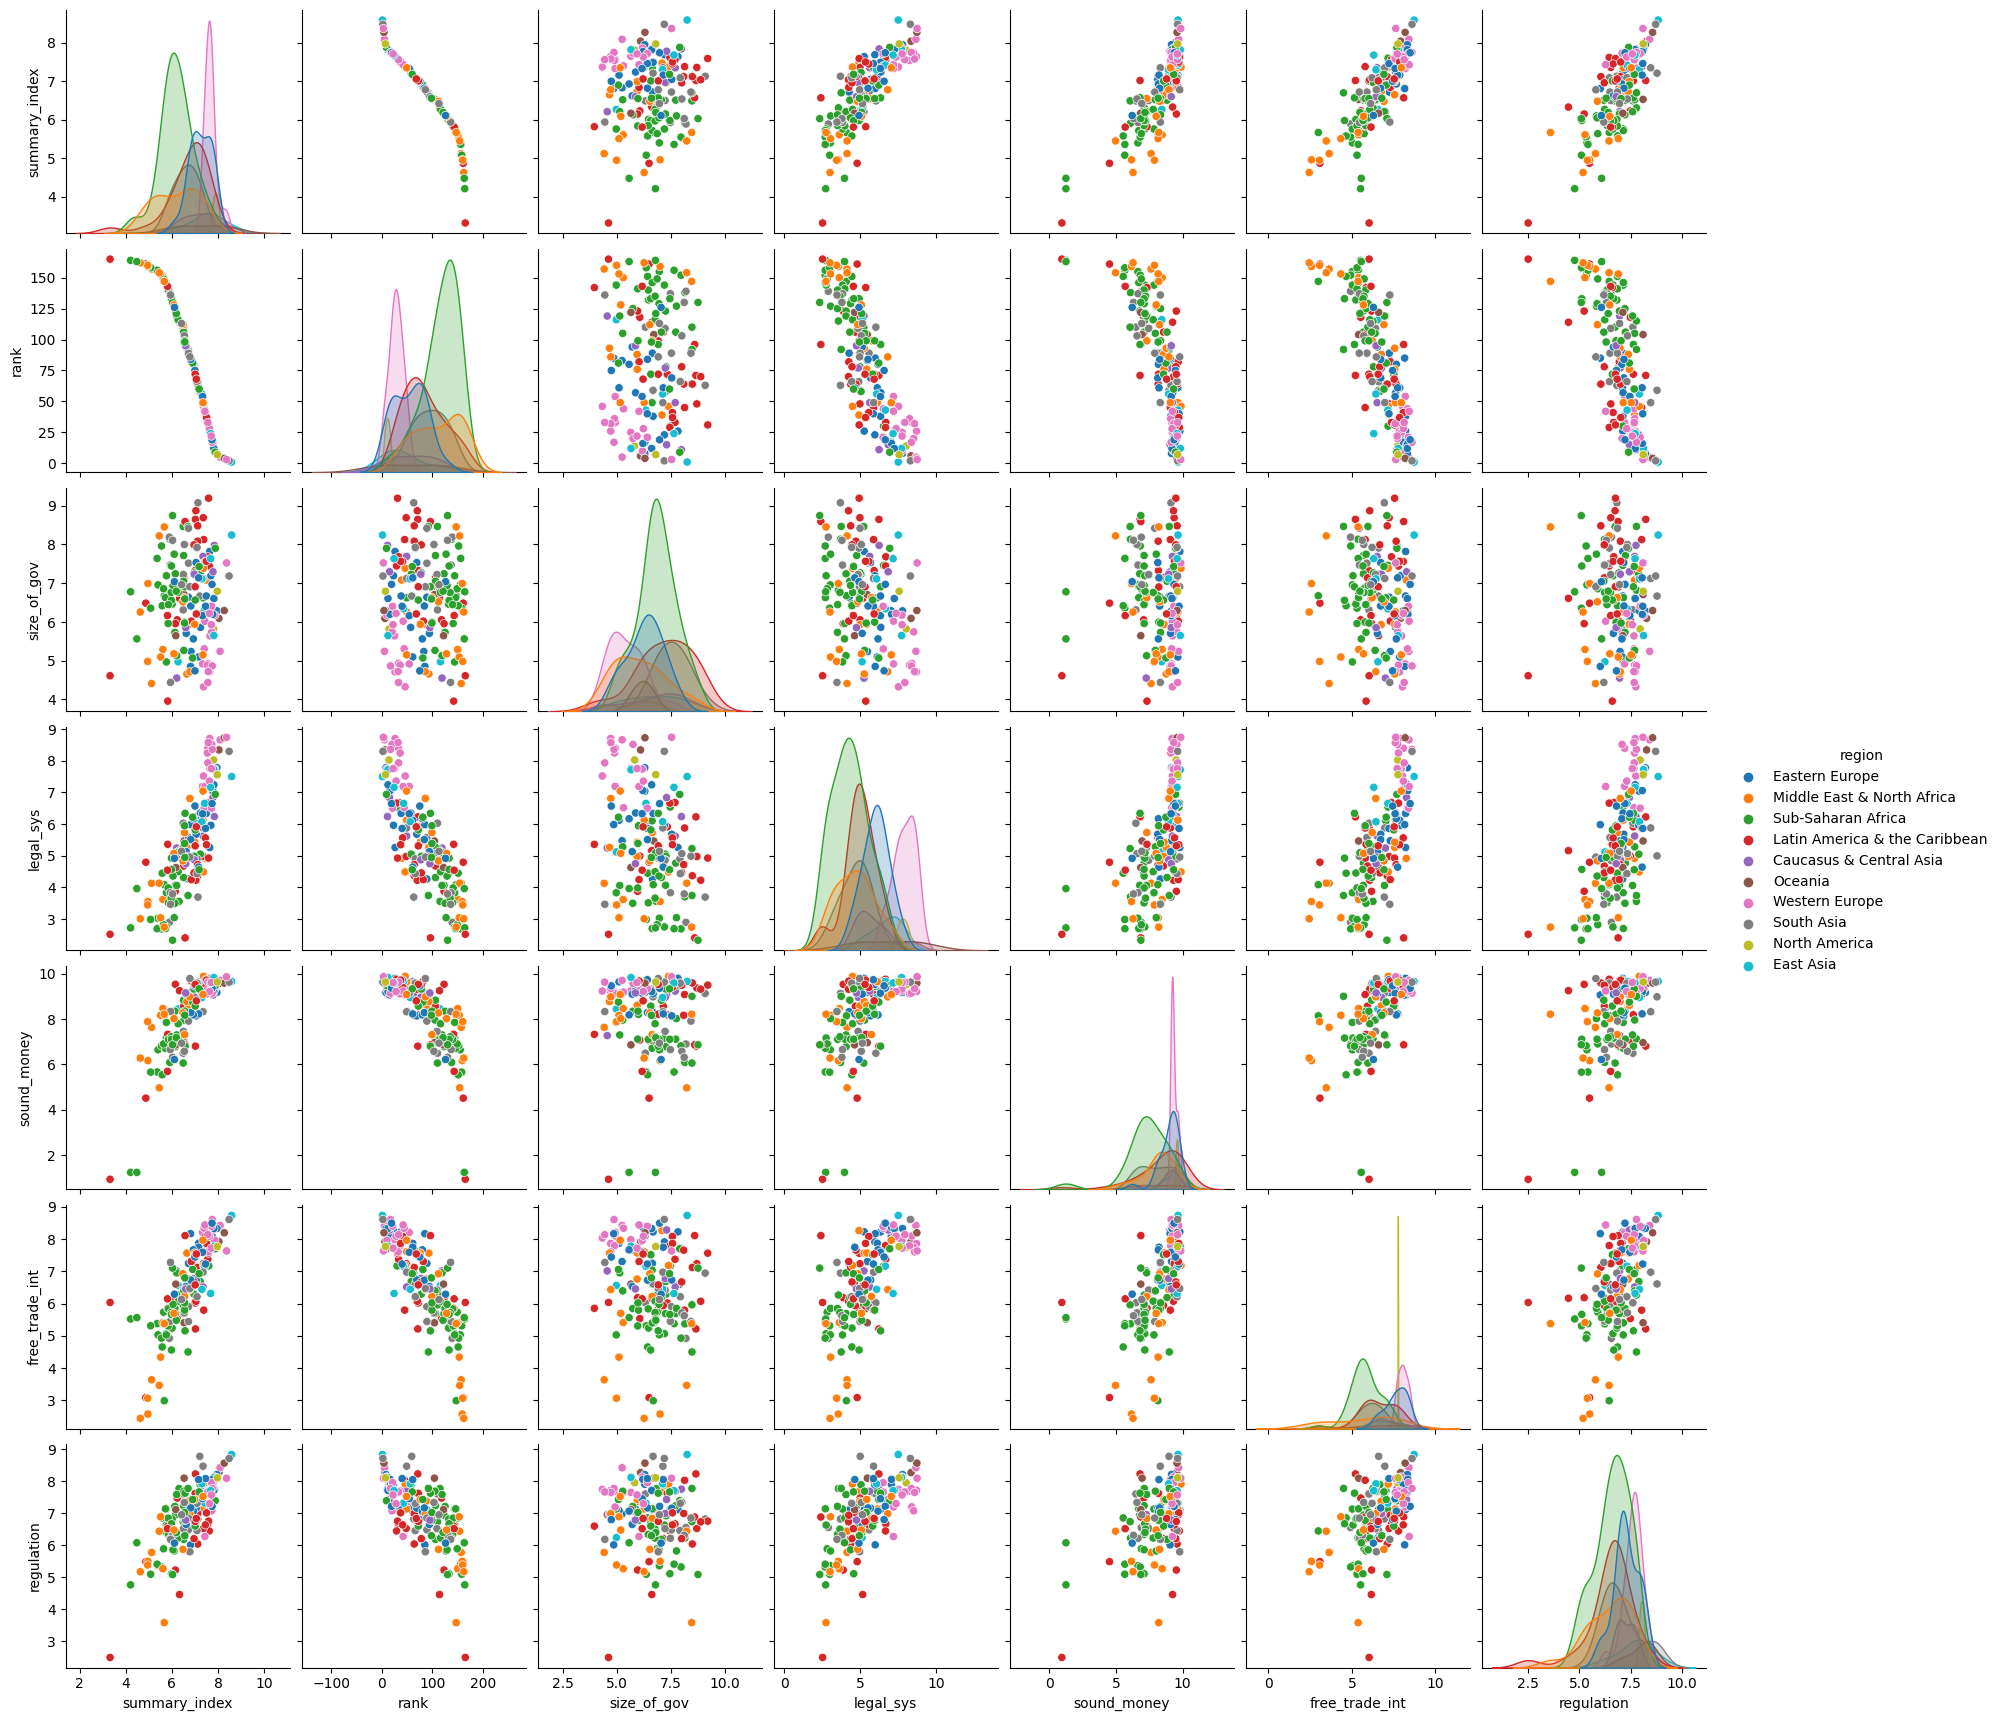

In [ ]:
df_2020_plot = df_2020.drop(['year'], axis=1)
sns.pairplot(df_2020_plot, hue="region")

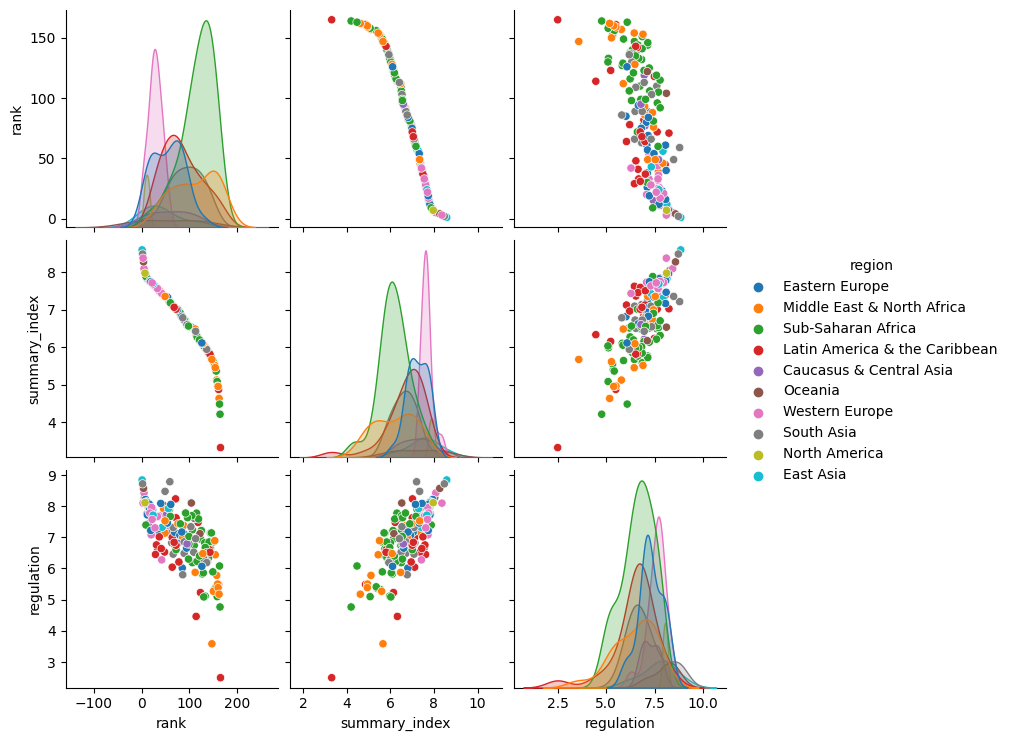

In [ ]:
sns.pairplot(df_2020_plot[["rank", "summary_index", "regulation", "region"]], hue="region")

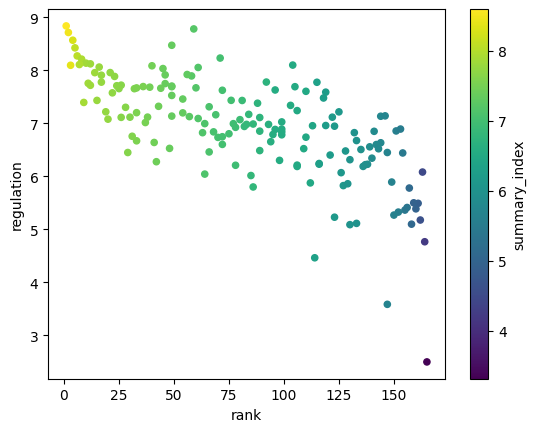

In [ ]:
ax1 = df_2020_plot.plot.scatter(x='rank',
                      y='regulation',
                      c='summary_index')

In [ ]:
df_2020.sort_values(by="regulation")


,year,summary_index,rank,size_of_gov,legal_sys,sound_money,free_trade_int,regulation,region,wb_region,wb_inc_class
countries,,,,,,,,,,,
"Venezuela, RB",2020,3.32,165.0,4.610514,2.524415,0.944935,6.034051,2.497096,Latin America & the Caribbean,Latin America & the Caribbean,0
"Yemen, Rep.",2020,5.67,147.0,8.450647,2.749852,8.211114,5.377539,3.584140,Middle East & North Africa,Middle East & North Africa,L
Brazil,2020,6.33,114.0,6.609372,5.161687,9.246107,6.166374,4.462561,Latin America & the Caribbean,Latin America & the Caribbean,UM
Sudan,2020,4.21,164.0,6.776924,2.727454,1.250000,5.523853,4.765301,Sub-Saharan Africa,Sub-Saharan Africa,L
Somalia,2020,6.03,130.0,8.742390,2.337749,6.864448,7.100276,5.087883,Sub-Saharan Africa,Sub-Saharan Africa,L
...,...,...,...,...,...,...,...,...,...,...,...
Malaysia,2020,7.35,49.0,7.120599,5.877152,8.319408,6.973938,8.473759,South Asia,East Asia & Pacific,UM
New Zealand,2020,8.27,4.0,6.292859,8.720375,9.579301,8.194353,8.569218,Oceania,East Asia & Pacific,H
Singapore,2020,8.48,2.0,7.184198,8.292375,9.621226,8.606354,8.715058,South Asia,East Asia & Pacific,H


In [ ]:
df = df.drop(['ISO Code 2', 'ISO Code 3', 'Quartile', ], axis=1)
df.columns = ['year', 'countries', 'summary_index', 'rank', 'size_of_gov', 'legal_sys', 'sound_money', 'free_trade_int', 'regulation', 'region', 'wb_region','wb_inc_class']

In [ ]:
df.set_index('countries', inplace=True)

In [ ]:
df_bulgaria = df.loc['Bulgaria']
df_bulgaria = df_bulgaria.dropna()
df_bulgaria.head()

,year,summary_index,rank,size_of_gov,legal_sys,sound_money,free_trade_int,regulation,region,wb_region,wb_inc_class
countries,,,,,,,,,,,
Bulgaria,2020,7.69,23.0,7.190874,5.960527,9.521858,7.911749,7.885563,Eastern Europe,Europe & Central Asia,UM
Bulgaria,2019,7.79,31.0,7.351462,5.938531,9.499403,8.337526,7.809823,Eastern Europe,Europe & Central Asia,UM
Bulgaria,2018,7.89,25.0,7.486681,5.944640,9.505795,8.585891,7.938010,Eastern Europe,Europe & Central Asia,UM
Bulgaria,2017,7.90,24.0,7.671337,5.790579,9.537781,8.604729,7.897824,Eastern Europe,Europe & Central Asia,UM
Bulgaria,2016,7.86,25.0,7.639771,5.744627,9.627936,8.513896,7.765385,Eastern Europe,Europe & Central Asia,UM


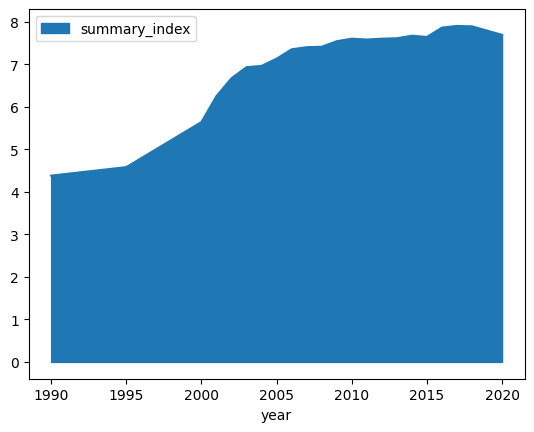

In [ ]:
ax = df_bulgaria.plot.area(x='year', y='summary_index')

In [ ]:
df_filtered = df[df.index.isin(['Bulgaria', 'Serbia'])]
df_filtered.head()

,year,summary_index,rank,size_of_gov,legal_sys,sound_money,free_trade_int,regulation,region,wb_region,wb_inc_class
countries,,,,,,,,,,,
Bulgaria,2020,7.69,23.0,7.190874,5.960527,9.521858,7.911749,7.885563,Eastern Europe,Europe & Central Asia,UM
Serbia,2020,6.82,84.0,6.410932,5.509864,8.279024,6.726897,7.169766,Eastern Europe,Europe & Central Asia,UM
Bulgaria,2019,7.79,31.0,7.351462,5.938531,9.499403,8.337526,7.809823,Eastern Europe,Europe & Central Asia,UM
Serbia,2019,7.21,73.0,6.661789,5.512129,8.356811,7.943779,7.575464,Eastern Europe,Europe & Central Asia,UM
Bulgaria,2018,7.89,25.0,7.486681,5.944640,9.505795,8.585891,7.938010,Eastern Europe,Europe & Central Asia,UM


<Axes: xlabel='year', ylabel='summary_index'>

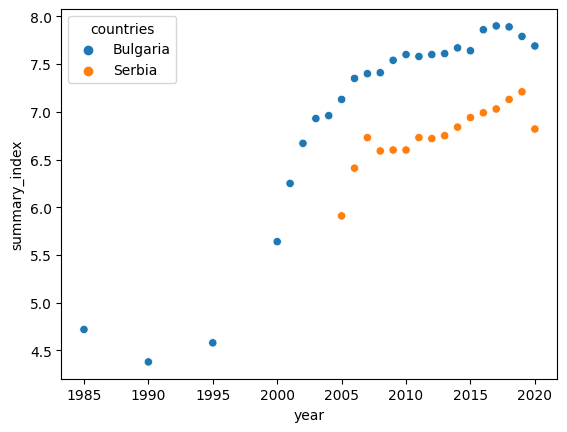

In [ ]:
df_filtered = df_filtered.reset_index()
pd.to_numeric(df_filtered["year"])

sns.scatterplot(data=df_filtered, x="year", y="summary_index", hue="countries")